# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# choose tyle and color palette

import seaborn as sns
sns.set_style("darkgrid")

colors = sns.color_palette('dark')

In [3]:
# useful pandas settings

# Use 2 decimal places in the output display
pd.set_option("display.precision", 2)

# Don't wrap dataframe across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set the maximum widths of columns
pd.set_option("display.max_colwidth", 90)

# Set max rows displayed in output to 20
pd.set_option("display.max_rows", 20)

In [4]:
# import the data
df = pd.read_csv('data/data_interim/preprocessed_data.csv')

In [5]:
# take a look at the data
df.head(2)

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
0,e9ee1187182a,2021-03-01,4,Stop using numpy.random.seed(),How to set random seeds for individual classes in Python,150,1,https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f?source=collec...,2021,3,1,581a9972805f,Stop using numpy.random.seed() How to set random seeds for individual classes in Python
1,fa1913854e95,2021-03-01,11,Semi-Automated Exploratory Data Analysis (EDA) in Python,Comprehensive Data Exploration Process with…,1000,8,https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-...,2021,3,1,7f96042c9809,Semi-Automated Exploratory Data Analysis (EDA) in Python Comprehensive Data Exploratio...


In [6]:
# get the 5 numbers statistics for the numerical columns 
df_num = df[['reading_time', 'claps', 'responses']]
df_num.describe()

,reading_time,claps,responses
count,51762.00,51762.00,51762.00
mean,7.33,253.09,1.84
std,3.86,784.81,4.97
min,1.00,0.00,0.00
25%,5.00,36.00,0.00
50%,6.00,96.00,1.00
75%,9.00,223.00,2.00
max,97.00,52000.00,307.00


In [7]:
# get the numbers of distinct values in each column
df.nunique()

user_id         12044
date             1794
reading_time       61
title           51762
subtitle        36477
claps            1136
responses          99
story_url       51762
year                5
month              12
day                31
story_id        51762
corpus          51762
dtype: int64

## Univariate Analysis

### Reading time

In [8]:
# 5 numbers stats for the reading time
df.reading_time.describe()

count    51762.00
mean         7.33
std          3.86
min          1.00
25%          5.00
50%          6.00
75%          9.00
max         97.00
Name: reading_time, dtype: float64

In [9]:
# longer blogs
df[(df.reading_time > 9) & (df.reading_time <= 30)].head(4)

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
1,fa1913854e95,2021-03-01,11,Semi-Automated Exploratory Data Analysis (EDA) in Python,Comprehensive Data Exploration Process with…,1000,8,https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-...,2021,3,1,7f96042c9809,Semi-Automated Exploratory Data Analysis (EDA) in Python Comprehensive Data Exploratio...
13,1e27e64320ad,2021-03-01,11,Best of arXiv — Readings for March 2021,A monthly selection of ML papers.,330,0,https://towardsdatascience.com/best-of-arxiv-readings-for-march-2021-c707263b2778?sour...,2021,3,1,c707263b2778,Best of arXiv — Readings for March 2021 A monthly selection of ML papers.
20,619319ac8220,2021-03-01,12,Activation Functions in Deep Neural Networks,A Guide on the Theory of Activation Functions in Neural…,52,0,https://towardsdatascience.com/activation-functions-in-deep-neural-networks-aae2a598f2...,2021,3,1,aae2a598f211,Activation Functions in Deep Neural Networks A Guide on the Theory of Activation Funct...
26,6f0b045d5681,2021-03-01,11,Get-git: A primer on Git,Say it fast enough and it sounds like get it…,166,1,https://towardsdatascience.com/get-git-a-primer-on-git-aa2cd1d9436f?source=collection_...,2021,3,1,aa2cd1d9436f,Get-git: A primer on Git Say it fast enough and it sounds like get it…


In [10]:
# blogs longer than 30 min
df_30min = df[df.reading_time >= 30]
df_30min.sort_values(by='reading_time').head(4)

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
40527,4b8da97b9a0,2021-06-13,30,"pytorch-widedeep, deep learning for tabular data IV: Deep Learning vs LightGBM",Making Sense of Big Data,110,0,https://towardsdatascience.com/pytorch-widedeep-deep-learning-for-tabular-data-iv-deep...,2021,6,13,cadcbf571eaf,"pytorch-widedeep, deep learning for tabular data IV: Deep Learning vs LightGBM Making ..."
28049,45a9e3b70a2,2021-04-06,30,Better Done Bayesian?,Hands-on Tutorials,230,9,https://towardsdatascience.com/better-done-bayesian-a7759e295355?source=collection_arc...,2021,4,6,a7759e295355,Better Done Bayesian? Hands-on Tutorials
24115,ca32a96e6dc7,2019-12-24,30,Data manipulation in R,"After importing your dataset into RStudio, most of the time you will need to…",37,0,https://towardsdatascience.com/data-manipulation-in-r-5540ed13ac5f?source=collection_a...,2019,12,24,5540ed13ac5f,"Data manipulation in R After importing your dataset into RStudio, most of the time you..."
31784,e5e839f0817c,2022-02-19,30,"I’ve Built a Public World Atlas with 2,500 Datasets to Explore","Inspired by Encarta, built in Python…",194,3,https://towardsdatascience.com/ive-built-a-public-world-atlas-with-2-500-datasets-to-e...,2022,2,19,8b9ae799e345,"I’ve Built a Public World Atlas with 2,500 Datasets to Explore Inspired by Encarta, bu..."


In [11]:
# how many blogs have more than 30 min reading time
df_30min.shape[0]

134

In [12]:
# there are podcasts among the blogs
df_podcast = df[(df.subtitle =='Podcast')|(df.subtitle == 'PODCAST') ]
df_podcast

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
119,59564831d1eb,2021-03-03,50,Economic History and the Road to the Singularity,Podcast,58,1,https://towardsdatascience.com/economic-history-and-the-road-to-the-singularity-288fe0...,2021,3,3,288fe053d965,Economic History and the Road to the Singularity Podcast
366,59564831d1eb,2021-03-10,38,Making AI Safe through Debate,Podcast,112,0,https://towardsdatascience.com/making-ai-safe-through-debate-935fe8a0ec5?source=collec...,2021,3,10,-935fe8a0ec5,Making AI Safe through Debate Podcast
633,59564831d1eb,2021-03-17,40,Consciousness and AI,PODCAST,35,1,https://towardsdatascience.com/consciousness-and-ai-8be0f8860247?source=collection_arc...,2021,3,17,8be0f8860247,Consciousness and AI PODCAST
888,59564831d1eb,2021-03-24,43,AI: Humanity’s Endgame?,PODCAST,142,1,https://towardsdatascience.com/ai-humanitys-endgame-e3d93e0f9969?source=collection_arc...,2021,3,24,e3d93e0f9969,AI: Humanity’s Endgame? PODCAST
1139,59564831d1eb,2021-03-31,44,"AI advances, but can the law keep up?",PODCAST,30,3,https://towardsdatascience.com/ai-advances-but-cat-the-law-keep-up-7d9669ce9a3d?source...,2021,3,31,7d9669ce9a3d,"AI advances, but can the law keep up? PODCAST"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47363,59564831d1eb,2022-09-28,4,AI observability and data as a cybersecurity weakness,PODCAST,22,0,https://towardsdatascience.com/ai-observability-and-data-as-a-cybersecurity-weakness-6...,2022,9,28,6523131ed7b9,AI observability and data as a cybersecurity weakness PODCAST
47527,59564831d1eb,2021-02-03,48,Answering the Fermi Question: Is AI our Great Filter?,PODCAST,72,0,https://towardsdatascience.com/answering-the-fermi-question-is-ai-our-great-filter-56b...,2021,2,3,56bd7f8fb44d,Answering the Fermi Question: Is AI our Great Filter? PODCAST
47871,59564831d1eb,2021-02-10,30,What Does Ethical AI Even Mean?,PODCAST,91,1,https://towardsdatascience.com/what-does-ethical-ai-even-mean-8b98909b42b9?source=coll...,2021,2,10,8b98909b42b9,What Does Ethical AI Even Mean? PODCAST
48146,59564831d1eb,2021-02-17,53,Superhuman AI and the Future of Democracy and Government,Podcast,49,3,https://towardsdatascience.com/superhuman-ai-and-the-future-of-democracy-and-governmen...,2021,2,17,5e57d3e53d42,Superhuman AI and the Future of Democracy and Government Podcast


In [13]:
# all podcasts correspond to the same user
df_podcast.nunique()

user_id          1
date            60
reading_time    13
title           60
subtitle         2
claps           53
responses        5
story_url       60
year             2
month           11
day             29
story_id        60
corpus          60
dtype: int64

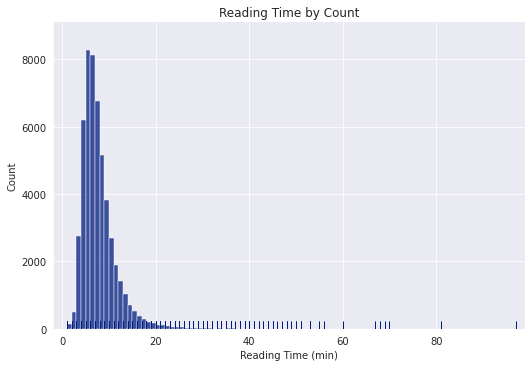

In [14]:
# create bins 
bins = np.arange(0, df.reading_time.max()+1, 1);

# create the plot
ax = sns.displot(df.reading_time, rug=True, 
                 color = colors[0], bins=bins, height=5, aspect=1.5);

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.02, y=0.1, tight=True);


# create title and axes labels    
ax.set(xlabel="Reading Time (min)")
ax.set(ylabel="Count")
plt.title("Reading Time by Count");

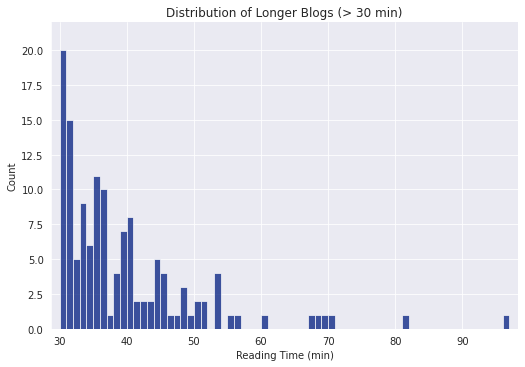

In [15]:
# create bins 
bins = np.arange(30, df.reading_time.max()+1, 1);

# create the plot
ax = sns.displot(df_30min.reading_time, rug=False, 
                 color = colors[0], bins=bins, height=5, aspect=1.5);

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.02, y=0.1, tight=True);


# create title and axes labels    
ax.set(xlabel='Reading Time (min)')
ax.set(ylabel='Count')
plt.title('Distribution of Longer Blogs (> 30 min)');

In [16]:
# the four longest blogs
df_30min.sort_values(by='reading_time', ascending=False).head()

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
50411,da2d000eaa4d,2022-12-08,97,Understanding Probability Distributions using Python,An intuitive and comprehensive guide to…,168,0,https://towardsdatascience.com/understanding-probability-distributions-using-python-9e...,2022,12,8,9eca9c1d9d38,Understanding Probability Distributions using Python An intuitive and comprehensive gu...
21301,da2d000eaa4d,2022-03-31,81,Introduction to SHAP Values and their Application in Machine Learning,Learn how the SHAP library works…,451,5,https://towardsdatascience.com/introduction-to-shap-values-and-their-application-in-ma...,2022,3,31,8003718e6827,Introduction to SHAP Values and their Application in Machine Learning Learn how the SH...
18293,47769000de75,2021-07-30,70,Zeno’s Enduring Example,"2500 years after settling a controversy and now as a reference frame origin, is the ge...",19,0,https://towardsdatascience.com/zenos-illustrative-example-bb371b99f25a?source=collecti...,2021,7,30,bb371b99f25a,Zeno’s Enduring Example 2500 years after settling a controversy and now as a reference...
23266,1b4bd5317a6e,2019-12-01,69,"Understanding Gaussian Process, the Socratic Way",-,725,12,https://towardsdatascience.com/understanding-gaussian-process-the-socratic-way-ba02369...,2019,12,1,-ba02369d804,"Understanding Gaussian Process, the Socratic Way -"
35902,2438f359ce0b,2022-10-11,68,Bridging the Gap between Artificial Intelligence and Artificial General Intelligence,-,122,0,https://towardsdatascience.com/bridging-the-gap-between-artificial-intelligence-and-ar...,2022,10,11,e77c3084f9f7,Bridging the Gap between Artificial Intelligence and Artificial General Intelligence -


<div class="alert alert-block alert-info">
    
<b>NOTES: reading time</b>
    
<li>average reading time is about 7 min;</li>
<li>75% of blogs have a reading time of less than 9 min;</li>
<li>the longest blog has a reading time of 97 min </li>
<li>there are 134 blogs longer than 30 min, and 5 longer than 60 min </li>
<li>there are several podcasts</li>
 
</div>

### Number of claps

In [17]:
# 5 number stats for number of claps
df.claps.describe()

count    51762.00
mean       253.09
std        784.81
min          0.00
25%         36.00
50%         96.00
75%        223.00
max      52000.00
Name: claps, dtype: float64

In [18]:
df[df.claps==52000]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
21562,c6ab8048de41,2018-03-28,8,Why so many data scientists are leaving their jobs,Frustrations of the data scientist!,52000,307,https://towardsdatascience.com/why-so-many-data-scientists-are-leaving-their-jobs-a1f0...,2018,3,28,a1f0329d7ea4,Why so many data scientists are leaving their jobs Frustrations of the data scientist!


In [19]:
# the number of distinct values
df.claps.nunique()

1136

In [20]:
# the blogs with less 1K claps
df_less1Kclaps = df[df.claps < 1000]
df_less1Kclaps.shape[0]

49601

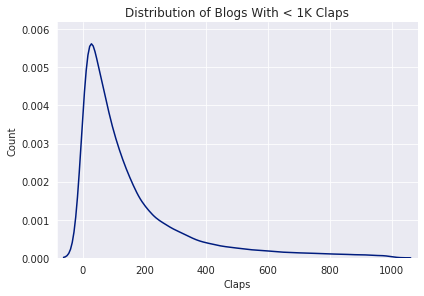

In [21]:
# create the plot
ax = sns.displot(data=df_less1Kclaps, x='claps', kind='kde',
                 color = colors[0], height=4, aspect=1.5);

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.02, y=0.1, tight=True);

# create title and axes labels    
ax.set(xlabel='Claps')
ax.set(ylabel='Count')
plt.title('Distribution of Blogs With < 1K Claps');

In [22]:
# the blogs with more than 10K claps
df_more10Kclaps = df[df.claps > 10000]
df_more10Kclaps.shape[0]

53

In [23]:
# the most popular blogs - largest number of claps
df_more10Kclaps.sort_values(by='claps', ascending=False).head(4)

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
21562,c6ab8048de41,2018-03-28,8,Why so many data scientists are leaving their jobs,Frustrations of the data scientist!,52000,307,https://towardsdatascience.com/why-so-many-data-scientists-are-leaving-their-jobs-a1f0...,2018,3,28,a1f0329d7ea4,Why so many data scientists are leaving their jobs Frustrations of the data scientist!
18489,e7803b4cff21,2018-05-14,7,How to build your own Neural Network from scratch in Python,A beginner’s guide to understanding the…,44000,165,https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-py...,2018,5,14,68998a08e4f6,How to build your own Neural Network from scratch in Python A beginner’s guide to unde...
48754,539e9e1c30df,2018-06-15,10,What exactly can you do with Python? Here are Python’s 3 main applications.,-,42000,130,https://towardsdatascience.com/what-can-you-do-with-python-the-3-main-applications-518...,2018,6,15,518db9a68a78,What exactly can you do with Python? Here are Python’s 3 main applications. -
48765,93711d5c7c5,2018-06-16,7,Object Detection with 10 lines of code,-,25000,191,https://towardsdatascience.com/object-detection-with-10-lines-of-code-d6cb4d86f606?sou...,2018,6,16,d6cb4d86f606,Object Detection with 10 lines of code -


In [24]:
# the blogs with more than 10K claps in 2018
df_more10Kclaps[df_more10Kclaps.year==2018]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
1202,f4a64ff38660,2018-07-06,8,How to land a Data Scientist job at your dream company — My journey to Airbnb,"The process, tips, and some resources",20000,121,https://towardsdatascience.com/how-to-land-a-data-scientist-job-at-your-dream-company-...,2018,7,6,f6a1e99892e8,How to land a Data Scientist job at your dream company — My journey to Airbnb The proc...
1220,c07aac64b6e1,2018-07-08,18,How to Build a Data Science Portfolio,-,19100,96,https://towardsdatascience.com/how-to-build-a-data-science-portfolio-5f566517c79c?sour...,2018,7,8,5f566517c79c,How to Build a Data Science Portfolio -
1463,e2af5c8737ec,2018-07-31,4,AutoKeras: The Killer of Google’s AutoML,-,14000,34,https://towardsdatascience.com/autokeras-the-killer-of-googles-automl-9e84c552a319?sou...,2018,7,31,9e84c552a319,AutoKeras: The Killer of Google’s AutoML -
10215,c6ab8048de41,2018-01-03,8,Probability concepts explained: Maximum likelihood estimation,Introducing the method of maximum…,19000,108,https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estim...,2018,1,3,c7b4342fdbb1,Probability concepts explained: Maximum likelihood estimation Introducing the method o...
15415,59564831d1eb,2018-11-02,6,Why you shouldn’t be a data science generalist,-,11000,50,https://towardsdatascience.com/why-you-shouldnt-be-a-data-science-generalist-f69ea37cd...,2018,11,2,f69ea37cdd2c,Why you shouldn’t be a data science generalist -
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48871,9532465e85b7,2018-06-27,10,"No, Machine Learning is not just glorified Statistics",-,13000,115,https://towardsdatascience.com/no-machine-learning-is-not-just-glorified-statistics-26...,2018,6,27,26d3952234e3,"No, Machine Learning is not just glorified Statistics -"
48949,cb2327c63f48,2018-02-04,9,Intuitively Understanding Variational Autoencoders,And why they’re so useful in creating your own…,13600,51,https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe...,2018,2,4,1bfe67eb5daf,Intuitively Understanding Variational Autoencoders And why they’re so useful in creati...
48951,61c6777224af,2018-02-04,3,How to learn Deep Learning in 6 months,-,13500,22,https://towardsdatascience.com/how-to-learn-deep-learning-in-6-months-e45e40ef7d48?sou...,2018,2,4,e45e40ef7d48,How to learn Deep Learning in 6 months -
48953,e2f299e30cb9,2018-02-04,3,Python is the Perfect Tool for any Problem,-,13000,58,https://towardsdatascience.com/python-is-the-perfect-tool-for-any-problem-f2ba42889a85...,2018,2,4,f2ba42889a85,Python is the Perfect Tool for any Problem -


In [25]:
# the blogs with more than 10K claps in 2019
df_more10Kclaps[df_more10Kclaps.year==2019]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
1523,dbc019e228f5,2019-08-03,8,6 Techniques Which Help Me Study Machine Learning Five Days Per Week,I studied machine learning every…,12600,40,https://towardsdatascience.com/6-techniques-which-help-me-study-machine-learning-five-...,2019,8,3,fb3e889fad80,6 Techniques Which Help Me Study Machine Learning Five Days Per Week I studied machine...
4086,e2f299e30cb9,2019-01-09,8,The Next Level of Data Visualization in Python,"How to make great-looking, fully-interactive plots with…",15500,67,https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e9903...,2019,1,9,dd6e99039d5e,"The Next Level of Data Visualization in Python How to make great-looking, fully-intera..."
4107,dbe185b1f1d0,2019-01-10,34,Using the latest advancements in deep learning to predict stock price movements,-,12400,95,https://towardsdatascience.com/aifortrading-2edd6fac689d?source=collection_archive----...,2019,1,10,2edd6fac689d,Using the latest advancements in deep learning to predict stock price movements -
24133,f392dd76f846,2019-12-26,7,I had no idea how to write code two years ago. Now I’m an AI engineer.,My journey in its rawest form,10200,65,https://towardsdatascience.com/i-had-no-idea-how-to-write-code-two-years-ago-now-im-an...,2019,12,26,13c530ab8227,I had no idea how to write code two years ago. Now I’m an AI engineer. My journey in i...
26277,5620d1ac33cd,2019-06-12,5,The Future of AI in the Face of Data Famine,-,11900,2,https://towardsdatascience.com/the-future-of-ai-in-the-face-of-data-famine-42d1fe36355...,2019,6,12,42d1fe36355c,The Future of AI in the Face of Data Famine -
26355,59564831d1eb,2019-06-16,6,Why you’re not a job-ready data scientist (yet),-,11800,31,https://towardsdatascience.com/why-youre-not-a-job-ready-data-scientist-yet-1a0d73f150...,2019,6,16,1a0d73f15012,Why you’re not a job-ready data scientist (yet) -
26378,7053de462a28,2019-06-17,8,10 Simple hacks to speed up your Data Analysis in Python,-,11100,38,https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-pytho...,2019,6,17,ec18c6396e6b,10 Simple hacks to speed up your Data Analysis in Python -
32622,39dfc90d7a34,2019-10-01,7,Turn Python Scripts into Beautiful ML Tools,"Introducing Streamlit, an app framework built for ML…",13000,36,https://towardsdatascience.com/coding-ml-tools-like-you-code-ml-models-ddba3357eace?so...,2019,10,1,ddba3357eace,"Turn Python Scripts into Beautiful ML Tools Introducing Streamlit, an app framework bu..."
36381,ba549bd3ff7e,2019-04-08,7,XGBoost Algorithm: Long May She Reign!,The new queen of Machine Learning algorithms taking over the…,10400,40,https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she...,2019,4,8,edd9f99be63d,XGBoost Algorithm: Long May She Reign! The new queen of Machine Learning algorithms ta...
49585,dbc019e228f5,2019-02-19,5,Thinking of Self-Studying Machine Learning? Remind yourself of these 6 things,I’m a self-taught¹…,10400,23,https://towardsdatascience.com/thinking-of-self-studying-machine-learning-remind-yours...,2019,2,19,b55a5f2b6c7d,Thinking of Self-Studying Machine Learning? Remind yourself of these 6 things I’m a se...


In [26]:
# the blogs with more than 10K claps in 2020
df_more10Kclaps[df_more10Kclaps.year==2020]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
16039,53a554e981f7,2020-03-03,6,Why jK8v!ge4D isn’t a good password,There’s a fundamental issue with password validation,11300,136,https://towardsdatascience.com/why-password-validation-is-garbage-56e0d766c12e?source=...,2020,3,3,56e0d766c12e,Why jK8v!ge4D isn’t a good password There’s a fundamental issue with password validation
17187,593908e0206,2020-03-31,7,Why Python is not the programming language of the future,Opinion,15300,167,https://towardsdatascience.com/why-python-is-not-the-programming-language-of-the-futur...,2020,3,31,30ddc5339b66,Why Python is not the programming language of the future Opinion
24750,a9e18adf3e74,2020-08-09,6,Why is the Central Limit Theorem Important to Data Scientists?,"DATA SCIENCE, STATISTICS",10100,5,https://towardsdatascience.com/why-is-central-limit-theorem-important-to-data-scientis...,2020,8,9,49a40f4f0b4f,"Why is the Central Limit Theorem Important to Data Scientists? DATA SCIENCE, STATISTICS"
33628,593908e0206,2020-05-01,8,Bye-bye Python. Hello Julia!,OPINION,12800,121,https://towardsdatascience.com/bye-bye-python-hello-julia-9230bff0df62?source=collecti...,2020,5,1,9230bff0df62,Bye-bye Python. Hello Julia! OPINION
33812,d67bf018ae6d,2020-05-04,6,Don’t Become a Data Scientist,OPINION,10500,79,https://towardsdatascience.com/dont-become-a-data-scientist-ee4769899025?source=collec...,2020,5,4,ee4769899025,Don’t Become a Data Scientist OPINION
45779,feb55b31bbd5,2020-01-24,8,How I went from zero coding skills to data scientist in 6 months,The 4 tools I used to teach myself…,14100,89,https://towardsdatascience.com/how-i-went-from-zero-coding-skills-to-data-scientist-in...,2020,1,24,c2207b65f2f3,How I went from zero coding skills to data scientist in 6 months The 4 tools I used to...


In [27]:
# the blogs with more than 10K claps 
df_more10Kclaps[df_more10Kclaps.year==2021]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus


In [28]:
# the blogs with more than 10K claps 
df_more10Kclaps[df_more10Kclaps.year==2022]

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus


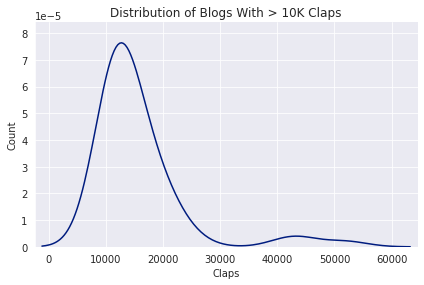

In [29]:
# create the plot
ax = sns.displot(data=df_more10Kclaps, x='claps', kind='kde',
                 color = colors[0], height=4, aspect=1.5);

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.02, y=0.1, tight=True);

# create title and axes labels    
ax.set(xlabel='Claps');
ax.set(ylabel='Count');
plt.title('Distribution of Blogs With > 10K Claps');

<div class="alert alert-block alert-info">
    
<b>NOTES: claps</b>
    
<li>the older articles have more claps;</li>
<li> no articles from 2021-2022 reached the 10K level</li>
    
</div>

### Responses

In [30]:
# the 5 numbers statistics for responses
df.responses.describe()

count    51762.00
mean         1.84
std          4.97
min          0.00
25%          0.00
50%          1.00
75%          2.00
max        307.00
Name: responses, dtype: float64

In [31]:
# how many blogs have no responses
df[df.responses == 0].shape[0]

24702

In [32]:
# take a look at the articles with numerous responses
df.sort_values(by='responses', ascending=False).head(4)

,user_id,date,reading_time,title,subtitle,claps,responses,story_url,year,month,day,story_id,corpus
21562,c6ab8048de41,2018-03-28,8,Why so many data scientists are leaving their jobs,Frustrations of the data scientist!,52000,307,https://towardsdatascience.com/why-so-many-data-scientists-are-leaving-their-jobs-a1f0...,2018,3,28,a1f0329d7ea4,Why so many data scientists are leaving their jobs Frustrations of the data scientist!
48765,93711d5c7c5,2018-06-16,7,Object Detection with 10 lines of code,-,25000,191,https://towardsdatascience.com/object-detection-with-10-lines-of-code-d6cb4d86f606?sou...,2018,6,16,d6cb4d86f606,Object Detection with 10 lines of code -
17187,593908e0206,2020-03-31,7,Why Python is not the programming language of the future,Opinion,15300,167,https://towardsdatascience.com/why-python-is-not-the-programming-language-of-the-futur...,2020,3,31,30ddc5339b66,Why Python is not the programming language of the future Opinion
18489,e7803b4cff21,2018-05-14,7,How to build your own Neural Network from scratch in Python,A beginner’s guide to understanding the…,44000,165,https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-py...,2018,5,14,68998a08e4f6,How to build your own Neural Network from scratch in Python A beginner’s guide to unde...


In [33]:
# blogs with more than 20 responses but less than 50
df_responded = df[(df.responses > 20) & (df.responses < 50)]

In [34]:
# blogs had more than 20 responses
df[(df.responses > 20)].shape[0]

467

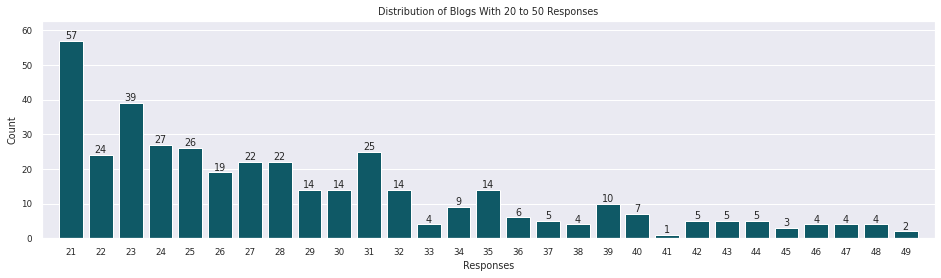

In [35]:
# adjust figure size and font size
sns.set(rc = {"figure.figsize":(16,4)})
sns.set(font_scale=.8)

# create bins 
bins = np.arange(20, df.responses.max()+1, 1);

# plot the churn distribution 
ax = sns.countplot(x='responses', data=df_responded, color=colors[9])

# pad margins so that markers don't get clipped by the axes
plt.margins(x=0.02, y=0.1, tight=True);

# create labels and ticks
for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Responses')
plt.ylabel('Count')

# create title
plt.title('Distribution of Blogs With 20 to 50 Responses');


In [36]:
# the number of blogs with more than 50 responses
df[df.responses>50].shape[0]

71

In [37]:
# create bins for responses counts
bin0 = df[df.responses == 0].shape[0]
bin1 = df[df.responses == 1].shape[0]
bin2 = df[(df.responses > 1) & (df.responses < 6)].shape[0]
bin3 = df[(df.responses > 5) & (df.responses <10)].shape[0]
bin4 = df[(df.responses > 10) & (df.responses <20)].shape[0]
bin5 = df[(df.responses > 20) & (df.responses <100)].shape[0]
bin6 = df[(df.responses > 100) & (df.responses <310)].shape[0]

# create a dataframe that holds the response bins and their label
response_bins = [bin0, bin1, bin2, bin3, bin4, bin5, bin6]
my_columns=['0', '1', '1 to 6', '5 to 10', '10 to 20', '20 to 100', '> 100']

response_df = pd.DataFrame(list(zip(my_columns, response_bins)), columns = ['ResponseBins', 'Counts'])

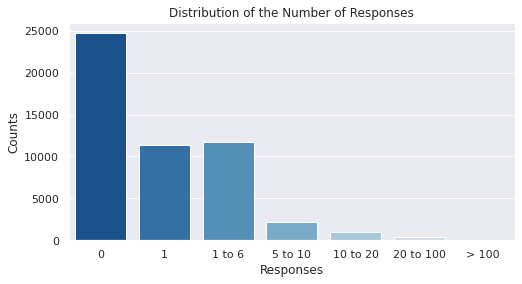

In [38]:
# adjust figure size and font size
sns.set(rc = {"figure.figsize":(8,4)})
sns.set(font_scale=1)

# use the dataset to extract the following information
sorted_counts = response_df['Counts'].value_counts()

# plot the chart
sns.barplot(data = response_df, x= 'ResponseBins', y = 'Counts', palette='Blues_r');

# labels and title
plt.xlabel('Responses')
plt.ylabel('Counts')
plt.title('Distribution of the Number of Responses');

<div class="alert alert-block alert-info">
    
<b>NOTES: responses</b>
    
<li> usually people do not write responses;</li>
<li> the most clapped article also has the largest number of responses</li>
    
</div>